# Notebook Imports

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 



# Constants

In [18]:
VOCAB_SIZE = 2500

TOKEN_SPAM_PROB_FILE = "SpamData/03_Testing/prob-spam.txt"
TOKEN_HAM_PROB_FILE = "SpamData/03_Testing/prob-nonspam.txt"
TOKEN_ALL_PROB_FILE = "SpamData/03_Testing/prob-all-tokens.txt"

TEST_FEATURE_MATRIX = "SpamData/03_Testing/test-features.txt"
TEST_TARGET_FILE = "SpamData/03_Testing/test-target.txt"

# Load the Data

In [19]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

# Calculating the Joint Probability

### The Dot Product

In [20]:
a = np.array([1, 2, 3])
b = np.array([0, 5, 4])

In [21]:
a.dot(b)

22

## Set the Prior

$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam \,) \, P(Spam)} {P(X)}$$

In [22]:
PROB_SPAM = 0.3116

In [23]:
np.log(prob_token_spam)

array([ -4.70632085,  -5.32161816,  -4.98677062, ...,  -9.20111798,
        -8.70034269, -10.40509078])

# Joint probability in log format

In [24]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)

In [25]:
joint_log_spam

array([  3.21643926,  13.38035269,  19.20668974, ..., -31.37387449,
        -4.78934991, -17.03515493])

In [27]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1-PROB_SPAM)

In [28]:
joint_log_ham

array([-11.05063426, -36.94310619, -38.25679825, ...,   4.8678588 ,
         0.30009455,   3.12806643])

# Making Predictions

### Checking for the higher joint probabilty

$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$

In [32]:
prediction = joint_log_spam > joint_log_ham

In [33]:
prediction[-5:]*1

array([0, 0, 0, 0, 0])

## Simplify

In [34]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1-PROB_SPAM)

# Metrics and Evaluation

## Accuracy

In [38]:
correct_docs = (y_test == prediction).sum()
print("Docs classified correctly", correct_docs)
numdocs_wrong = X_test.shape[0] - correct_docs
print("Docs classified incorrectly", numdocs_wrong)

Docs classified correctly 1671
Docs classified incorrectly 52


In [40]:
# Accuracy
correct_docs/len(X_test)

0.9698200812536274

In [42]:
fraction_wrong = numdocs_wrong/len(X_test)
print("Fraction classified incorrectly is {:.2%}".format(fraction_wrong))
print("Accuracy of the model is {:.2%}".format(1-fraction_wrong))

Fraction classified incorrectly is 3.02%
Accuracy of the model is 96.98%


## Visualising the Results

In [56]:
# Chart Styling Info
yaxis_label = "P(X | Spam)"
xaxis_label = "P(X | Nonspam)"

line_data = np.linspace(start=-14000, stop=1, num=1000)

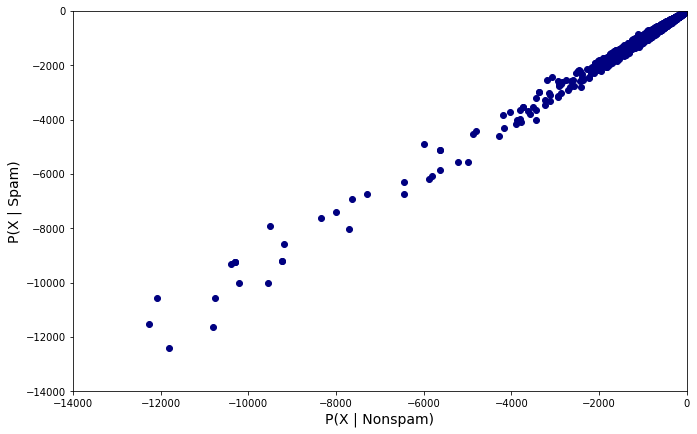

In [53]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

#Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color="navy")

plt.show()

## The Decision Boundary

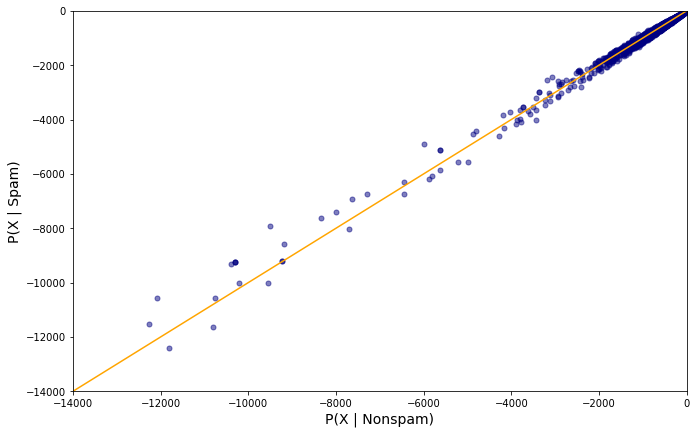

In [66]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

#Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color="navy", alpha=0.5, s=25)
plt.plot(line_data, line_data, color="orange")

plt.show()

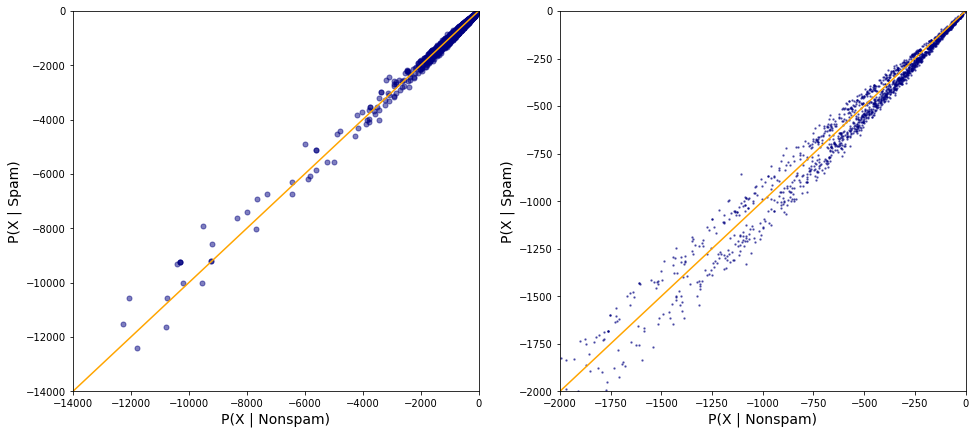

In [72]:
plt.figure(figsize=(16, 7))

#Chart Nr 1:
plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

#Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color="navy", alpha=0.5, s=25)
plt.plot(line_data, line_data, color="orange")

#Chart Nr 2:
plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

#Set scale
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color="navy", alpha=0.5, s=2)
plt.plot(line_data, line_data, color="orange")

plt.show()

In [73]:
# Chart Styling
sns.set_style("whitegrid")
labels = "Actual Category"

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, 
                          labels: y_test})

/Users/floriandreyer/opt/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


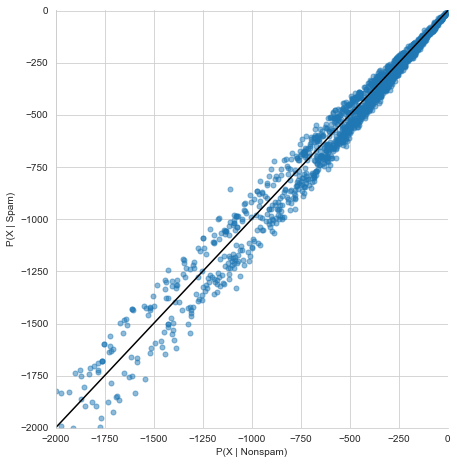

In [81]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5, fit_reg=False,
          scatter_kws = {"alpha": 0.5, "s": 25})

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(line_data, line_data, color="black")

plt.show()

/Users/floriandreyer/opt/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


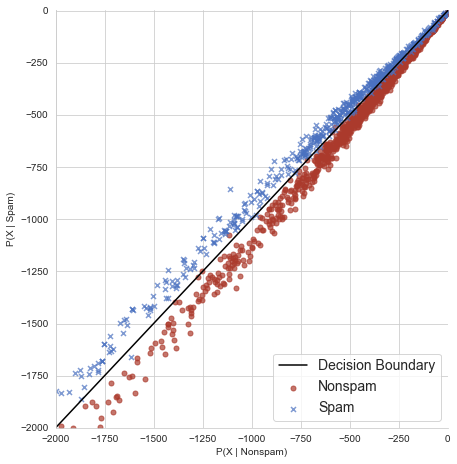

In [93]:
my_colors = ["#AB3A2C", "#4A71C0"]

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5, fit_reg=False, legend=False,
          scatter_kws = {"alpha": 0.7, "s": 25}, hue=labels, markers=["o", "x"], palette=my_colors)

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(line_data, line_data, color="black")

plt.legend(("Decision Boundary", "Nonspam", "Spam"), loc="lower right", fontsize=14)

plt.show()

# False Positives and False Negatives

In [94]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1163,  560]))

In [95]:
true_pos = (y_test == 1) & (prediction == 1)

In [96]:
true_pos.sum()

548

In [98]:
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()

12

In [99]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

40

## Recall Score

In [108]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print("Recall score is {:.2%}".format(recall_score))

Recall score is 93.20%


## Precision Score

In [111]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print("Precision score is {:.2%}".format(precision_score))

Precision score is 97.86%


## F-Score or F1 Score

In [114]:
f1_score = 2* (precision_score * recall_score) / (precision_score + recall_score)
print("F Score is {:.2%}".format(f1_score))

F Score is 95.47%
